In [1]:
#Time series analysis using Time Series Algorithm(Supervised Machine Learning Algorithm)
# predict the forecasting data we actualy use moving average and cumulative moving average to predict the data
# Analyzing df_temperature ie Land average Temperature with respect to different time of record
import pandas as pd
df_temperature=pd.read_csv(r"C:\Users\GT-499\Desktop\Excelr\Dr.Gns Presentation\COMPLETED BATCH\Presentation 9.30-11.30\42_Time series\GlobalTemperatures.csv")
df_temperature

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
2,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
3,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
4,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...,...
1987,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1988,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1989,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1990,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [2]:
#STEP1:IMPORTING LIBRARIES AND READING THE DATA
#df_temperature ie Land average Temperature with respect to different time of record
#ACF is an autocorrelation function
#Plot the autocorrelation function
#Plots lags on the horizontal and the correlations on vertical axis.

from matplotlib import pyplot as plt




In [3]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         1992 non-null   object 
 1   LandAverageTemperature                     1992 non-null   float64
 2   LandAverageTemperatureUncertainty          1992 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 140.2+ KB


In [4]:
df_temperature.shape
# 19992 ROWS OF DIFFERENT TEMPERATURE RECORDED AND 9 COLUMNS

(1992, 9)

In [5]:
df_temperature.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

Text(0, 0.5, 'Temperature [°C]')

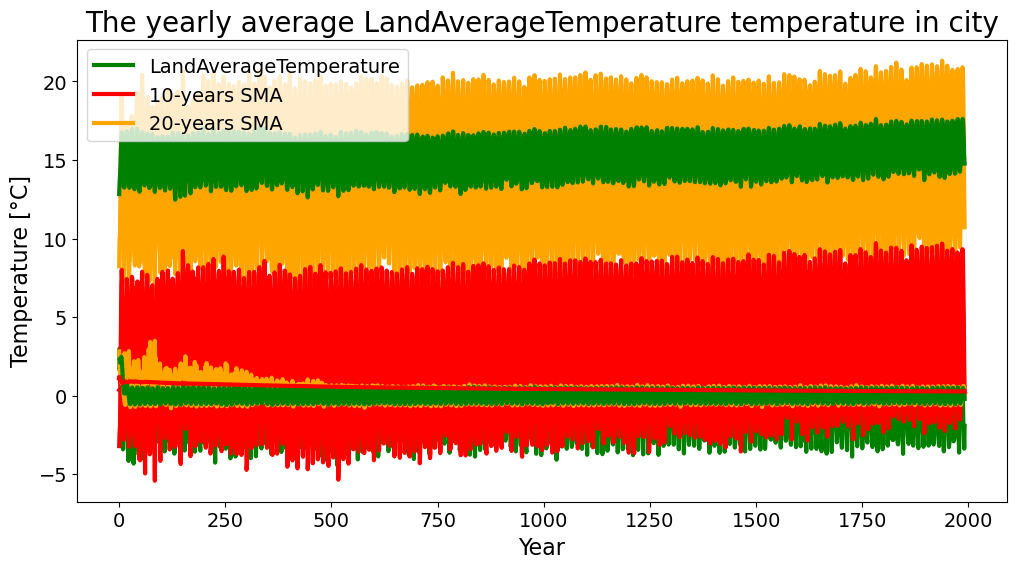

In [14]:
#Step3:  SMA over a period of 10 and 20 years 
#.rolling data applies time based calculations to come up with event count averages over time
# Simp
df_temperature['SMA_10'] = df_temperature.LandAverageTemperature.rolling(10, min_periods=1).mean()
df_temperature['SMA_20'] = df_temperature.LandAverageTemperature.rolling(20, min_periods=1).mean()

colors = ['green', 'red', 'orange']
# Line plot 
# green=LandAverageTemperature,red=10 years,orange=20 years
df_temperature.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['LandAverageTemperature', '10-years SMA', '20-years SMA'], fontsize=14)
plt.title('The yearly average LandAverageTemperature temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)
# SMA Simple Moving Average 
# It calculates the unweightewd mean or the previous M or N points
# We Prefer selecting the sliding window datapoints
# Leged; area: Land average

Text(0, 0.5, 'LandAverageTemperature [°C]')

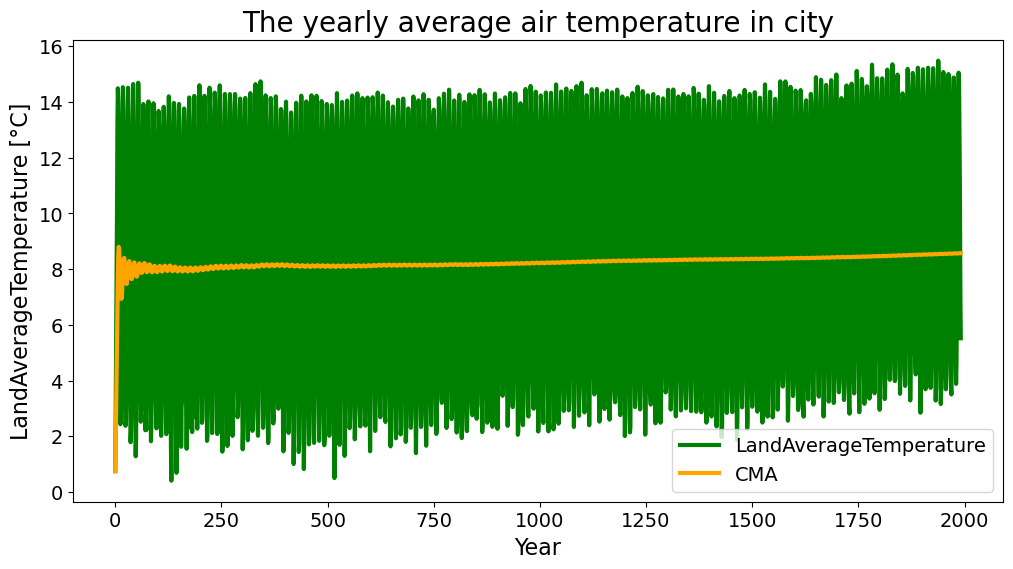

In [7]:
# Cumulative Moving average
# CMA Air temperature
df_temperature['CMA'] = df_temperature.LandAverageTemperature.expanding().mean()

# green - LANDAvg  tEMP- GREEN,  and Orange -CMA
colors = ['green', 'orange']
# line plot
df_temperature[['LandAverageTemperature', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['LandAverageTemperature', 'CMA'], fontsize=14)
plt.title('The yearly average air temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('LandAverageTemperature [°C]', fontsize=16)


In [8]:
# WE are able to anlyze landaverage temperature using time series algorithm
df_temperature.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'SMA_10', 'SMA_20', 'CMA'],
      dtype='object')

In [15]:
#)

Text(0, 0.5, 'LandAverageTemperatureUncertainty [°C]')

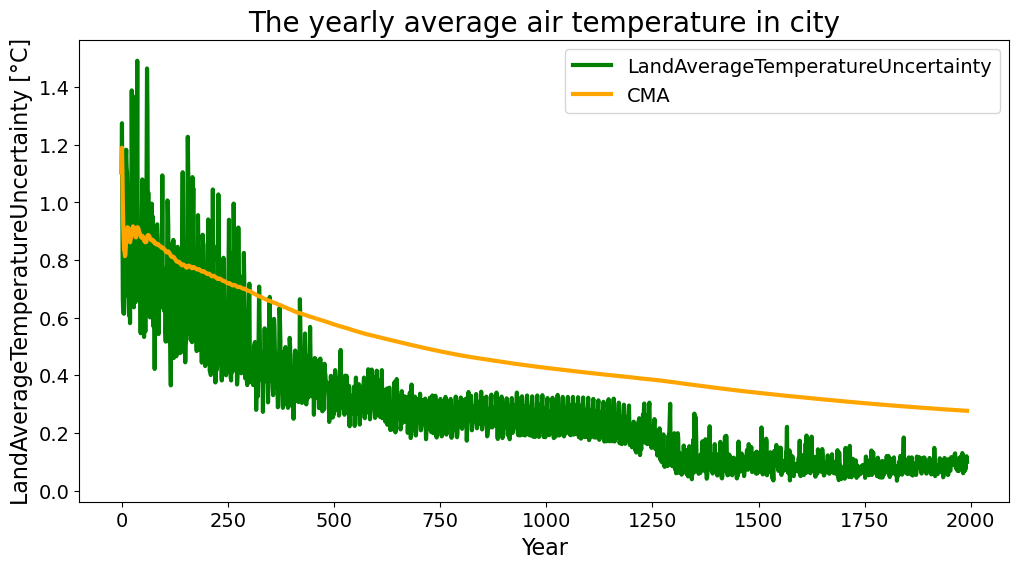

In [10]:
df_temperature['CMA'] = df_temperature.LandAverageTemperatureUncertainty.expanding().mean()

# green - LANDAvg  tEMP- GREEN,  and Orange -CMA
colors = ['green', 'orange']
# line plot
df_temperature[['LandAverageTemperatureUncertainty', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['LandAverageTemperatureUncertainty', 'CMA'], fontsize=14)
plt.title('The yearly average air temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('LandAverageTemperatureUncertainty [°C]', fontsize=16)

In [ ]:
# Time series nonstationary

In [11]:
# end of time series

In [12]:
#df_temperature.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'SMA_10', 'SMA_20', 'CMA'],
      dtype='object')

In [1]:
#